### Importing all the libraries necessary 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

### Importing the dataset

In [2]:
excel_file = 'Banking Case - Data.xlsx'
df1 = pd.read_excel(excel_file, sheet_name = 'Transaction Data')
df2 = pd.read_excel(excel_file, sheet_name = 'Customer Demographics')

### Merging the two datasets based on the 'Customer_number' column

In [3]:
df = pd.merge(df1, df2, on='Customer_number')
df.drop(['Sno'], axis = 1, inplace=True)
df.describe()

,Customer_number,duration,campaign,last_contact_day,previous,Count_Txn,age
count,45211.000000,45172.000000,45211.000000,45211.000000,45211.000000,45210.000000,45211.000000
mean,23606.000000,258.139511,2.762182,41.832253,0.580323,299.614952,40.980005
std,13051.435847,257.631452,3.087291,99.457030,2.303441,115.721788,10.838273
min,1001.000000,-167.000000,0.000000,-9.000000,0.000000,-423.000000,18.000000
25%,12303.500000,103.000000,1.000000,1.000000,0.000000,200.000000,33.000000
50%,23606.000000,180.000000,2.000000,1.000000,0.000000,300.000000,39.000000
75%,34908.500000,319.000000,3.000000,1.000000,0.000000,400.000000,48.000000
max,46211.000000,4918.000000,63.000000,871.000000,275.000000,499.000000,121.000000


In [4]:
print(df.isnull().sum())

Customer_number      0
Insurance            0
balance             55
housing              0
loan                 8
contact             43
duration            39
campaign             0
last_contact_day     0
previous             0
poutcome            15
Term Deposit         8
Count_Txn            1
age                  0
job                 13
marital             18
education           21
Annual Income       17
Gender               0
dtype: int64


In [5]:
nume_col = df.select_dtypes(include=['int64','float64']).columns

In [6]:
skewness = df[nume_col].skew()
print(skewness)

Customer_number      0.000000
duration             3.143683
campaign             4.824712
last_contact_day     2.627820
previous            41.846454
Count_Txn           -0.015093
age                  0.952016
dtype: float64


In [7]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print(missing_percentage)

Customer_number     0.000000
Insurance           0.000000
balance             0.121652
housing             0.000000
loan                0.017695
contact             0.095110
duration            0.086262
campaign            0.000000
last_contact_day    0.000000
previous            0.000000
poutcome            0.033178
Term Deposit        0.017695
Count_Txn           0.002212
age                 0.000000
job                 0.028754
marital             0.039813
education           0.046449
Annual Income       0.037601
Gender              0.000000
dtype: float64


In [8]:
print(df.isnull().sum())

Customer_number      0
Insurance            0
balance             55
housing              0
loan                 8
contact             43
duration            39
campaign             0
last_contact_day     0
previous             0
poutcome            15
Term Deposit         8
Count_Txn            1
age                  0
job                 13
marital             18
education           21
Annual Income       17
Gender               0
dtype: int64


In [9]:
df

,Customer_number,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn,age,job,marital,education,Annual Income,Gender
0,1001,no,2143,yes,no,NaN,261.0,1,2,0,unknown,no,351.0,58,management,married,tertiary,839368,M
1,1002,no,29,yes,no,unknown,151.0,1,2,0,unknown,no,326.0,44,technician,single,secondary,1452858,M
2,1003,no,2,yes,yes,unknown,76.0,1,2,0,NaN,no,422.0,33,entrepreneur,married,NaN,4851383,F
3,1004,no,1506,yes,no,unknown,92.0,1,2,0,unknown,no,113.0,47,blue collar,married,unknown,3207754,F
4,1005,no,1,no,no,unknown,198.0,1,2,0,unknown,no,342.0,33,unknown,single,unknown,2562322,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,46207,no,825,no,no,cellular,0.0,0,-1,0,unknown,yes,152.0,51,technician,married,tertiary,2229818,M
45207,46208,no,1729,no,no,cellular,0.0,0,-1,0,unknown,yes,334.0,121,retired,divorced,primary,2783556,M
45208,46209,no,5715,no,no,cellular,1127.0,5,184,3,success,yes,381.0,72,retired,married,secondary,443512,M
45209,46210,no,668,no,no,telephone,0.0,0,-1,0,unknown,no,211.0,57,blue-collar,married,secondary,4193684,F


In [10]:
df.replace(['?', ' ', '\\','??','??//','????','//??','???'], np.nan, inplace=True)

In [11]:
df['age'].fillna(df['age'].mean(), inplace=True)
df['campaign'].fillna(df['campaign'].median(), inplace=True)
df['previous'].fillna(df['previous'].median(), inplace=True)
df['balance'].fillna(df['balance'].median(), inplace=True)
df['loan'].fillna(df['loan'].mode()[0], inplace=True)
df['contact'].fillna(df['contact'].mode()[0], inplace=True)
df['duration'].fillna(df['duration'].median(), inplace=True)
df['poutcome'].fillna(df['poutcome'].mode()[0], inplace=True)
df['Term Deposit'].fillna(df['Term Deposit'].mode()[0], inplace=True)
df['Count_Txn'].fillna(df['Count_Txn'].mean(), inplace=True)
df['job'].fillna(df['job'].mode()[0], inplace=True)
df['marital'].fillna(df['marital'].mode()[0], inplace=True)
df['education'].fillna(df['education'].mode()[0], inplace=True)
df['Annual Income'] = pd.to_numeric(df['Annual Income'], errors='coerce')
df['Annual Income'].fillna(df['Annual Income'].mean(), inplace=True)

In [12]:
# Columns with negative values
columns_with_negatives = ['duration', 'last_contact_day','Count_Txn']

# Replace negative values with 0
for column in columns_with_negatives:
    df[column] = df[column].apply(lambda x: 0 if x < 0 else x)

In [13]:
print(df.isnull().sum())

Customer_number     0
Insurance           0
balance             0
housing             0
loan                0
contact             0
duration            0
campaign            0
last_contact_day    0
previous            0
poutcome            0
Term Deposit        0
Count_Txn           0
age                 0
job                 0
marital             0
education           0
Annual Income       0
Gender              0
dtype: int64


In [14]:
print(df.dtypes)

Customer_number       int64
Insurance            object
balance             float64
housing              object
loan                 object
contact              object
duration            float64
campaign              int64
last_contact_day      int64
previous              int64
poutcome             object
Term Deposit         object
Count_Txn           float64
age                   int64
job                  object
marital              object
education            object
Annual Income       float64
Gender               object
dtype: object


In [15]:
df

,Customer_number,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn,age,job,marital,education,Annual Income,Gender
0,1001,no,2143.0,yes,no,cellular,261.0,1,2,0,unknown,no,351.0,58,management,married,tertiary,839368.0,M
1,1002,no,29.0,yes,no,unknown,151.0,1,2,0,unknown,no,326.0,44,technician,single,secondary,1452858.0,M
2,1003,no,2.0,yes,yes,unknown,76.0,1,2,0,unknown,no,422.0,33,entrepreneur,married,secondary,4851383.0,F
3,1004,no,1506.0,yes,no,unknown,92.0,1,2,0,unknown,no,113.0,47,blue collar,married,unknown,3207754.0,F
4,1005,no,1.0,no,no,unknown,198.0,1,2,0,unknown,no,342.0,33,unknown,single,unknown,2562322.0,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,46207,no,825.0,no,no,cellular,0.0,0,0,0,unknown,yes,152.0,51,technician,married,tertiary,2229818.0,M
45207,46208,no,1729.0,no,no,cellular,0.0,0,0,0,unknown,yes,334.0,121,retired,divorced,primary,2783556.0,M
45208,46209,no,5715.0,no,no,cellular,1127.0,5,184,3,success,yes,381.0,72,retired,married,secondary,443512.0,M
45209,46210,no,668.0,no,no,telephone,0.0,0,0,0,unknown,no,211.0,57,blue-collar,married,secondary,4193684.0,F


In [16]:
df['contact'] = df['contact'].replace({
    'Mobile': 'cellular',
    'Tel': 'telephone'
})

df['job'] = df['job'].replace({
    'blue collar': 'blue-collar'
})

df['education'] = df['education'].replace({
    'ter tiary': 'tertiary',
    'Primary': 'primary'
})

In [17]:
print(df.isnull().sum())

Customer_number     0
Insurance           0
balance             0
housing             0
loan                0
contact             0
duration            0
campaign            0
last_contact_day    0
previous            0
poutcome            0
Term Deposit        0
Count_Txn           0
age                 0
job                 0
marital             0
education           0
Annual Income       0
Gender              0
dtype: int64


In [18]:
def handle_outliers_with_iqr(df):
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find median value within IQR
        iqr_median = df[(df[column] >= Q1) & (df[column] <= Q3)][column].median()
        
        # Replace outliers with the IQR median value
        df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = iqr_median
    
    return df

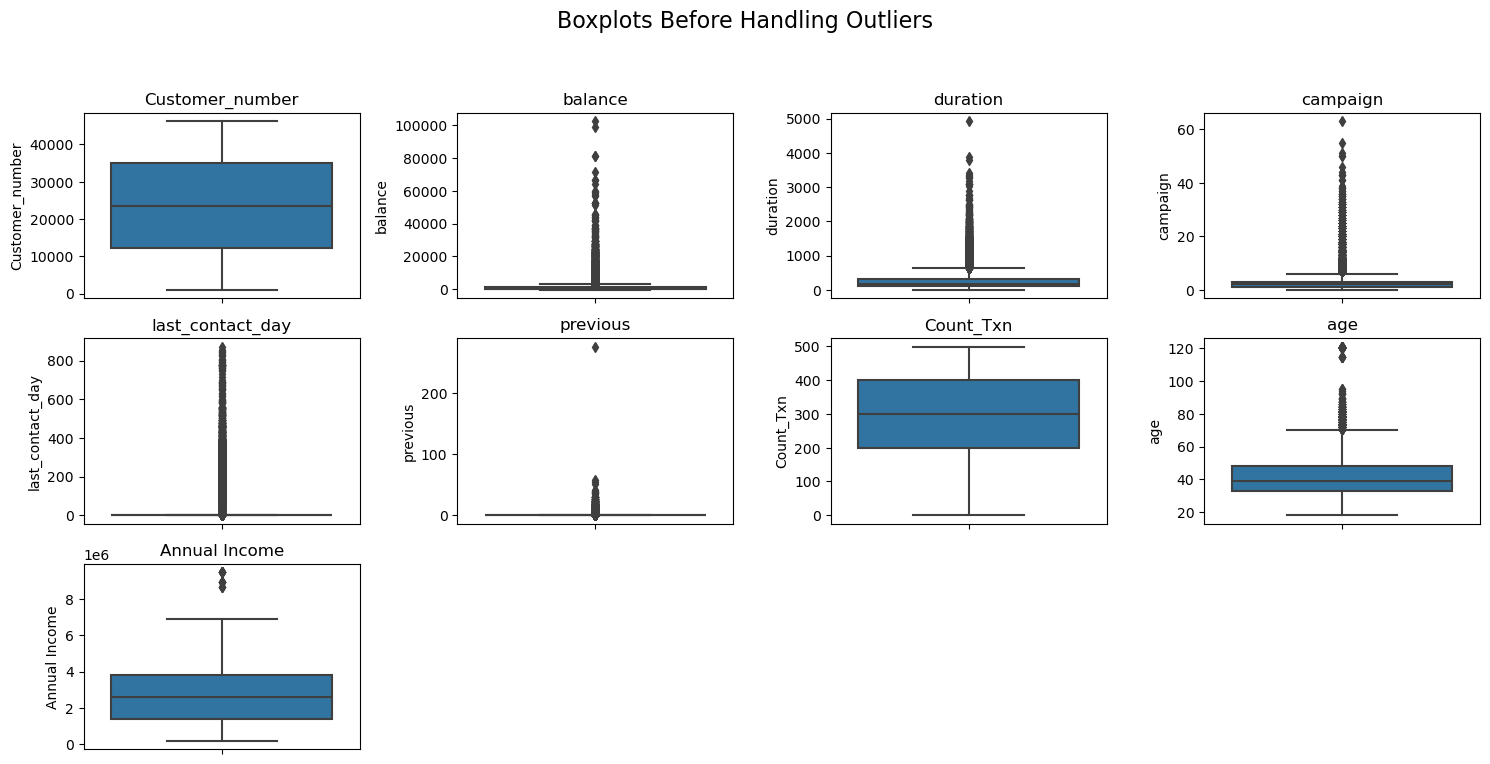

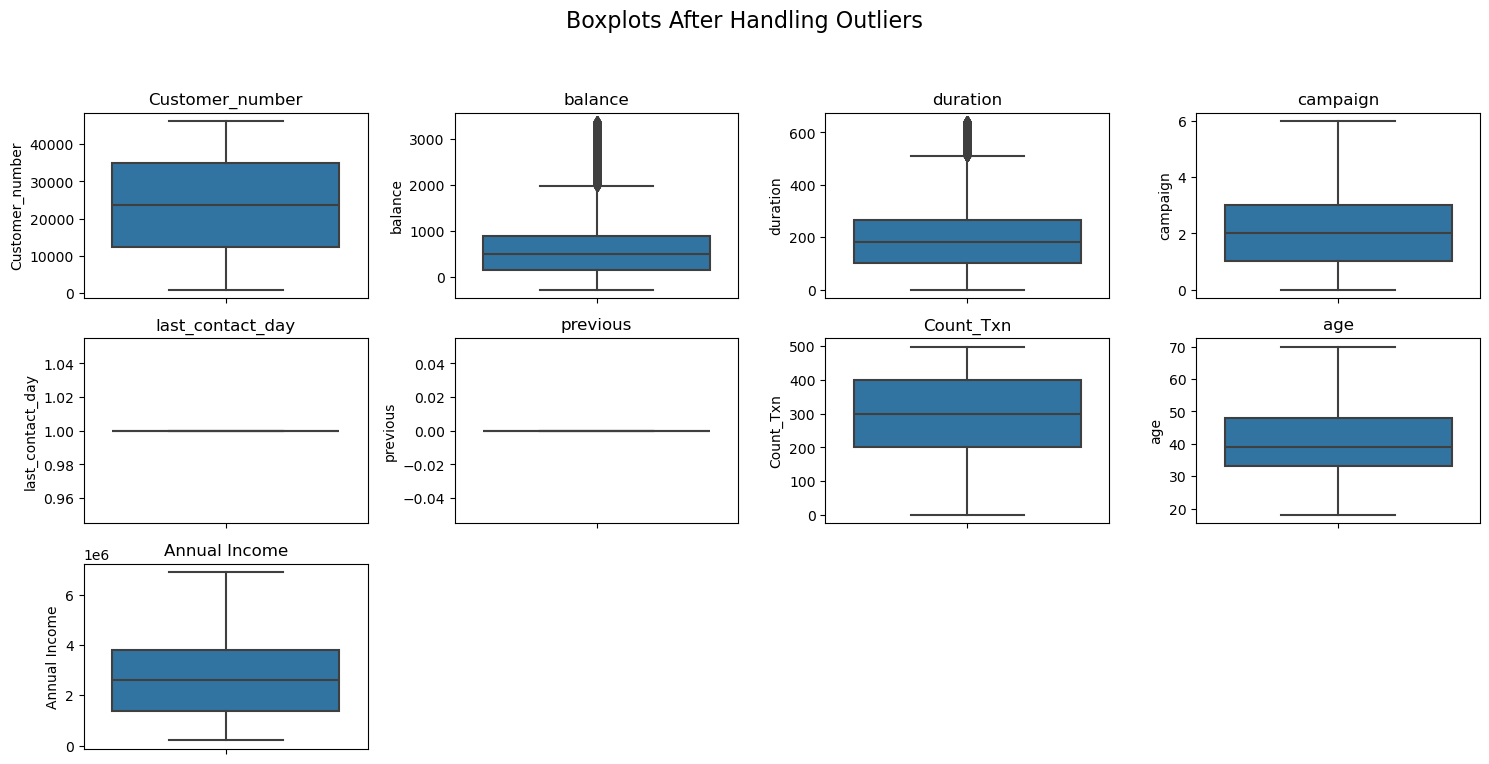

In [19]:
def plot_boxplots(df, title):
    plt.figure(figsize=(15, 10))
    df_numeric = df.select_dtypes(include=['float64', 'int64'])
    for i, column in enumerate(df_numeric.columns, 1):
        plt.subplot(4, 4, i)  # Adjust the grid size based on the number of columns
        sns.boxplot(y=df[column])
        plt.title(column)
    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Plot boxplots before handling outliers
plot_boxplots(df, "Boxplots Before Handling Outliers")

# Handle outliers in the dataset
data_handled = handle_outliers_with_iqr(df.copy())

# Plot boxplots after handling outliers
plot_boxplots(data_handled, "Boxplots After Handling Outliers")


In [20]:
df.to_csv('Banking_processed.csv', index=False)

## Analysis and Visualization Questions:

#### 1. Income Insights: How many customers have no annual income? Plot and present the data distribution of these customers.

The number of customers with no annual income are:  0


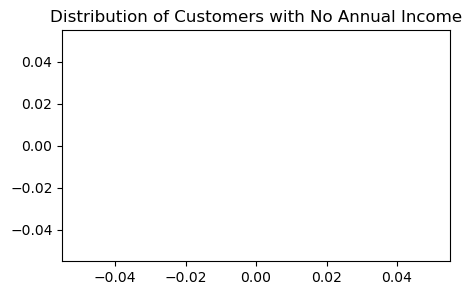

In [21]:
no_income_customers = df[df['Annual Income'] == 0]
print("The number of customers with no annual income are: ",len(no_income_customers))

plt.figure(figsize=(5,3))
sns.histplot(no_income_customers['Annual Income'])
plt.title('Distribution of Customers with No Annual Income')
plt.show()

# Hence we can see that there are no customers with 0 annual income.

#### 2. Loan-Less Customer Profile: Filter out customers who don’t have any type of loan. Plot the distribution of their Income, balance, and profession. How do these metrics differ from those with loans?

The number of customers without any loan are:  37967


c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


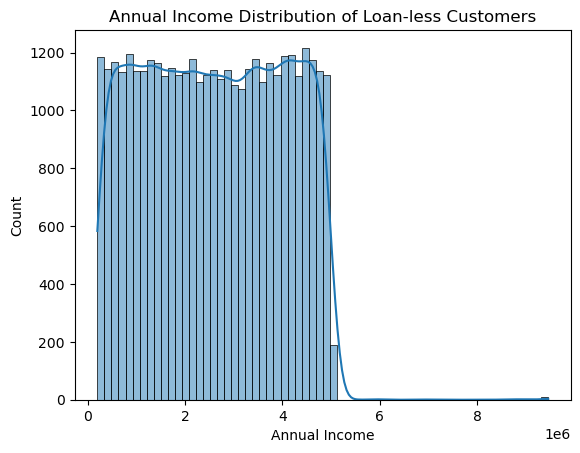

c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


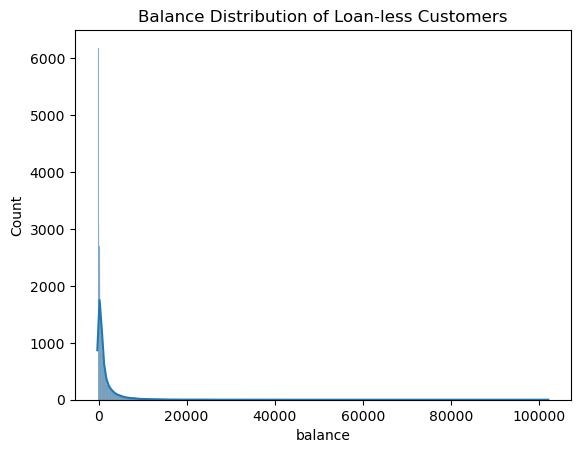

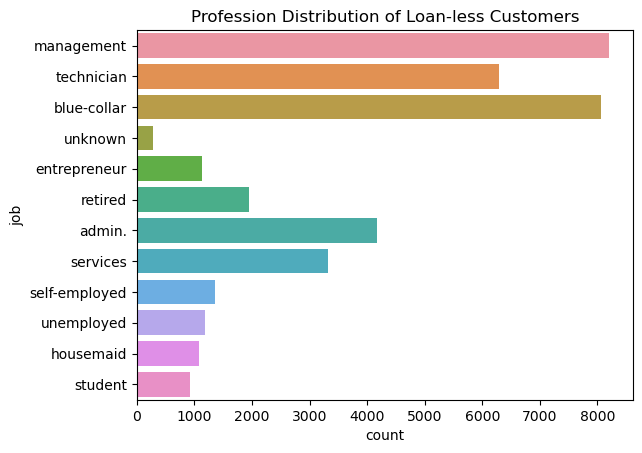

In [22]:
loan_less_customers = df[df['loan'] == 'no']
print("The number of customers without any loan are: ",len(loan_less_customers))

sns.histplot(loan_less_customers['Annual Income'], kde=True)
plt.title('Annual Income Distribution of Loan-less Customers')
plt.show()

sns.histplot(loan_less_customers['balance'], kde=True)
plt.title('Balance Distribution of Loan-less Customers')
plt.show()

sns.countplot(y=loan_less_customers['job'])
plt.title('Profession Distribution of Loan-less Customers')
plt.show()

The number of customers without any loan are:  7244


c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


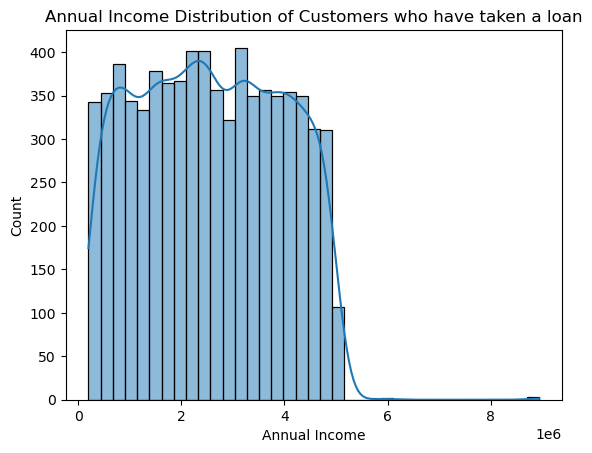

c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


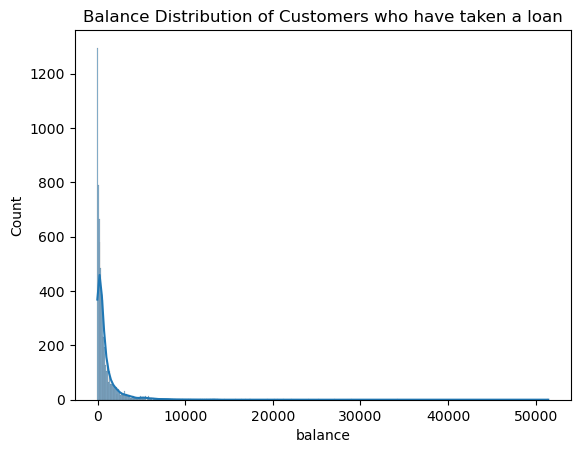

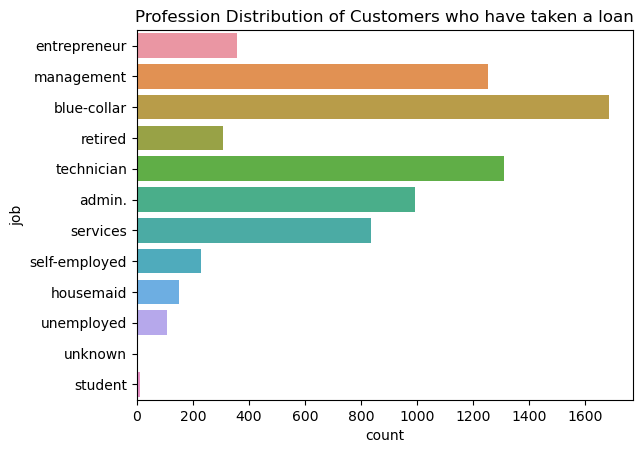

In [23]:
loan_customers = df[df['loan'] == 'yes']
print("The number of customers without any loan are: ",len(loan_customers))

sns.histplot(loan_customers['Annual Income'], kde=True)
plt.title('Annual Income Distribution of Customers who have taken a loan')
plt.show()

sns.histplot(loan_customers['balance'], kde=True)
plt.title('Balance Distribution of Customers who have taken a loan')
plt.show()

sns.countplot(y=loan_customers['job'])
plt.title('Profession Distribution of Customers who have taken a loan')
plt.show()

### 3. Loan and Insaurance analysis: Calculate the percentage of customers with a loan who have taken out insurance. Visualize this data and discuss potential implications.

The number of customers with a loan are:  7244
The number of customers with a loan and insurance are:  301
Percentage of customers with a loan who have taken out insurance:  4.155162893429045


c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


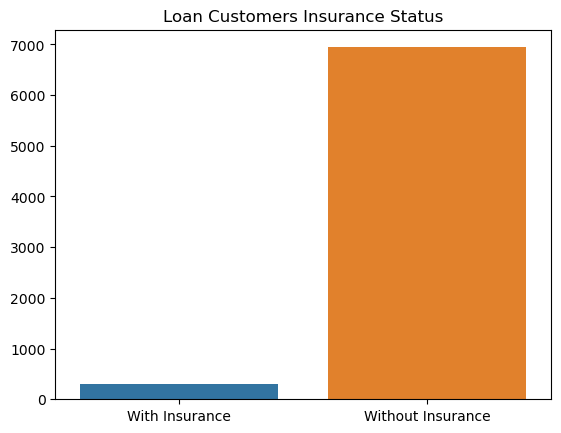

In [24]:
loan_customers = df[df['loan'] == 'yes']
print("The number of customers with a loan are: ",len(loan_customers))

loan_with_insurance = loan_customers[loan_customers['Insurance'] == 'yes']
print("The number of customers with a loan and insurance are: ",len(loan_with_insurance))

percent = (len(loan_with_insurance) / len(loan_customers)) * 100
print("Percentage of customers with a loan who have taken out insurance: ",percent)

sns.barplot(x=['With Insurance', 'Without Insurance'], y=[len(loan_with_insurance), len(loan_customers)-len(loan_with_insurance)])
plt.title('Loan Customers Insurance Status')
plt.show()

### 4. Communication Strategy Insights:Analyse and summarize the best Contact method (with the highest success percentage) to contact people to ascertain the status of term deposit subscriptions.


contact
cellular     82.624315
unknown      10.020798
telephone     7.354888
Name: proportion, dtype: float64


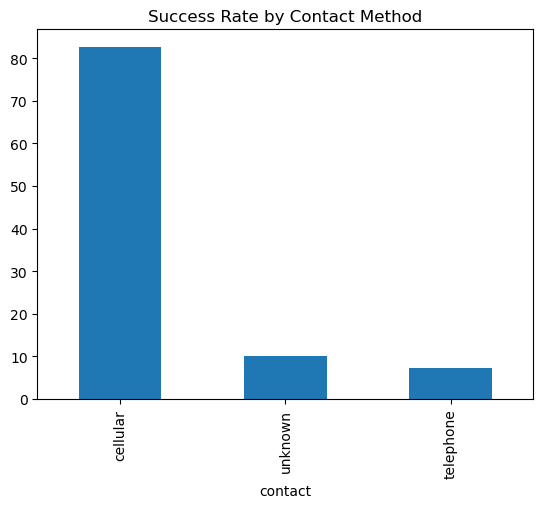

In [25]:
contact_success = df[df['Term Deposit'] == 'yes']['contact'].value_counts(normalize=True) * 100
print(contact_success)
contact_success.plot(kind='bar')
plt.title('Success Rate by Contact Method')
plt.show()


### 5. Age and Home Loans: Determine which age group has the highest percentage of home loans. Present this data visually and discuss possible reasons.


age
10-20       2.061856
20-30      10.284148
30-40      10.714084
40-50      10.036480
50-60       7.673237
60-70       1.455604
70-80       0.000000
80-90       0.000000
90-100      0.000000
100-110          NaN
110-120     0.000000
120-130     0.000000
dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6756\1844137457.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  home_loan_by_age = df[(df['loan'] == 'yes') & (df['housing'] == 'yes')].groupby(age_group).size()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6756\1844137457.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_by_age = df.groupby(age_group).size()


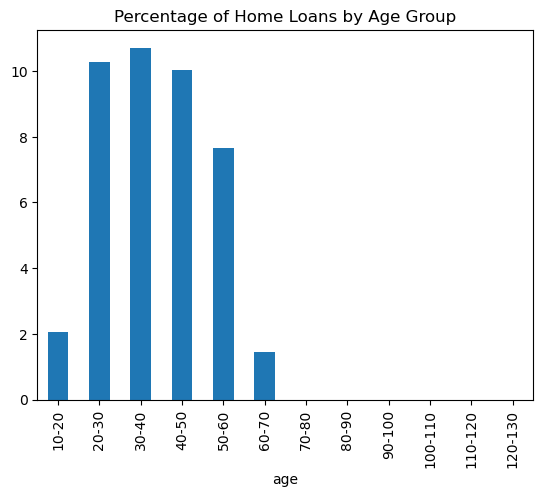

In [26]:
age_group = pd.cut(df['age'], bins=[10, 20, 30, 40, 50, 60, 70,80,90,100,110,120,130], 
                   labels=['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80','80-90','90-100','100-110','110-120','120-130'])
home_loan_by_age = df[(df['loan'] == 'yes') & (df['housing'] == 'yes')].groupby(age_group).size()
total_by_age = df.groupby(age_group).size()
home_loan_percentage = (home_loan_by_age / total_by_age) * 100
print(home_loan_percentage)
home_loan_percentage.plot(kind='bar')
plt.title('Percentage of Home Loans by Age Group')
plt.show()

### 6. Income and Age Relationship: Investigate any relationships between annual income and age group. Use appropriate plots and statistics to present the findings.

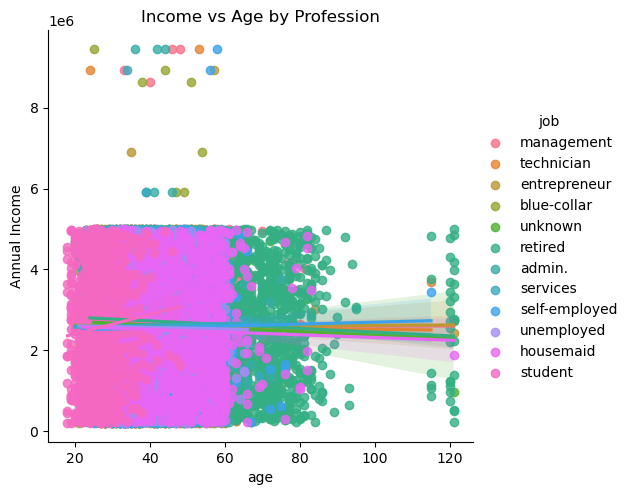

In [27]:
sns.lmplot(x='age', y='Annual Income', data=df, hue='job')
plt.title('Income vs Age by Profession')
plt.show()


In [28]:
binary_columns = ['Insurance', 'housing', 'loan', 'Term Deposit']

for column in binary_columns:
    df[column] = df[column].map({'yes': 1, 'no': 0})

df

,Customer_number,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn,age,job,marital,education,Annual Income,Gender
0,1001,0,2143.0,1,0,cellular,261.0,1,2,0,unknown,0,351.0,58,management,married,tertiary,839368.0,M
1,1002,0,29.0,1,0,unknown,151.0,1,2,0,unknown,0,326.0,44,technician,single,secondary,1452858.0,M
2,1003,0,2.0,1,1,unknown,76.0,1,2,0,unknown,0,422.0,33,entrepreneur,married,secondary,4851383.0,F
3,1004,0,1506.0,1,0,unknown,92.0,1,2,0,unknown,0,113.0,47,blue-collar,married,unknown,3207754.0,F
4,1005,0,1.0,0,0,unknown,198.0,1,2,0,unknown,0,342.0,33,unknown,single,unknown,2562322.0,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,46207,0,825.0,0,0,cellular,0.0,0,0,0,unknown,1,152.0,51,technician,married,tertiary,2229818.0,M
45207,46208,0,1729.0,0,0,cellular,0.0,0,0,0,unknown,1,334.0,121,retired,divorced,primary,2783556.0,M
45208,46209,0,5715.0,0,0,cellular,1127.0,5,184,3,success,1,381.0,72,retired,married,secondary,443512.0,M
45209,46210,0,668.0,0,0,telephone,0.0,0,0,0,unknown,0,211.0,57,blue-collar,married,secondary,4193684.0,F


## Modeling

### 1. Term Deposit and Related Variables: Identify variables strongly related to Term Deposit. Discuss your approach when the variable is categorical. Which tests or metrics will you employ?


In [29]:
columns_to_one_hot_encode = ['contact', 'poutcome', 'marital', 'education', 'Gender']
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoded_columns = one_hot_encoder.fit_transform(df[columns_to_one_hot_encode])

# Create new columns for one-hot encoded columns
one_hot_encoded_columns_df = pd.DataFrame(one_hot_encoded_columns, columns=one_hot_encoder.get_feature_names_out(columns_to_one_hot_encode))

# Label encoding for job column
label_encoder = LabelEncoder()
label_encoded_job = label_encoder.fit_transform(df['job'])


# Concatenate the original dataframe with the one-hot encoded columns and the label encoded job column
df_encoded = pd.concat([df, one_hot_encoded_columns_df], axis=1)
df_encoded['job_encoded'] = label_encoded_job

# Drop the original columns that were encoded
df_encoded.drop(columns_to_one_hot_encode + ['job'], axis=1, inplace=True)

# Print the encoded dataframe
print(df_encoded)

       Customer_number  Insurance  balance  housing  loan  duration  campaign  \
0                 1001          0   2143.0        1     0     261.0         1   
1                 1002          0     29.0        1     0     151.0         1   
2                 1003          0      2.0        1     1      76.0         1   
3                 1004          0   1506.0        1     0      92.0         1   
4                 1005          0      1.0        0     0     198.0         1   
...                ...        ...      ...      ...   ...       ...       ...   
45206            46207          0    825.0        0     0       0.0         0   
45207            46208          0   1729.0        0     0       0.0         0   
45208            46209          0   5715.0        0     0    1127.0         5   
45209            46210          0    668.0        0     0       0.0         0   
45210            46211          0   2971.0        0     0     361.0         2   

       last_contact_day  pr

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [30]:
df_encoded.to_csv("Banking_encoded.csv", index=False)

In [31]:
if 'contact' in df_encoded.columns:
    df_encoded['contact'] = label_encoder.fit_transform(df_encoded['contact'])

# Calculate correlation matrix for numerical and encoded variables
corr = df_encoded.corr()

# Custom color scale similar to the one in the screenshot
custom_colorscale = [
    [0.0, "black"],   # Most negative correlations (close to -1)
    [0.25, "purple"],  # Less negative correlations
    [0.5, "orange"],  # Neutral correlations (close to 0)
    [0.75, "red"],    # Less positive correlations
    [1.0, "yellow"]   # Most positive correlations (close to 1)
]

fig = px.imshow(
    corr, 
    text_auto=True, 
    aspect="auto", 
    color_continuous_scale=custom_colorscale, 
    zmin=-1, 
    zmax=1,
    width=3000,  # Adjust width for better visibility
    height=800   # Adjust height for better visibility
)

# Update layout to match the style in your screenshot
fig.update_layout(
    title=dict(text='Heatmap to find Correlation between the columns', x=0.5, font=dict(size=30, color='green')),
    xaxis=dict(tickangle=45, tickfont=dict(color='green')),  # Rotate x-axis labels and change color to green
    yaxis=dict(tickfont=dict(color='green')),  # Change y-axis label color to green
    coloraxis_colorbar=dict(
        title="Correlation", 
        tickvals=np.linspace(-1, 1, 9),  # Ensure a good distribution of color bar ticks
        lenmode='fraction', 
        len=0.75  # Adjust the length of the color bar
    ),
)

# Improve visibility of annotations by changing font size
fig.update_traces(
    textfont=dict(size=9, color="black")  # Increase the font size of annotations and set color to black
)

fig.show()

In [32]:
# Extracting correlations with "Term Deposit"
term_deposit_corr = corr['Term Deposit'].sort_values(ascending=False)
print(term_deposit_corr)


Term Deposit           1.000000
duration               0.393618
poutcome_success       0.306788
Customer_number        0.296287
contact_cellular       0.134735
last_contact_day       0.103015
previous               0.093236
education_tertiary     0.066506
marital_single         0.063584
balance                0.049748
job_encoded            0.040223
poutcome_other         0.031955
age                    0.030782
contact_telephone      0.015031
education_unknown      0.012053
poutcome_failure       0.009885
Gender_F               0.009590
marital_divorced       0.002849
Count_Txn             -0.002589
Gender_M              -0.009590
poutcome_pending      -0.012703
Annual Income         -0.013044
Insurance             -0.022419
education_secondary   -0.036485
education_primary     -0.040333
marital_married       -0.060362
loan                  -0.068185
campaign              -0.073521
housing               -0.139173
contact_unknown       -0.150218
poutcome_unknown      -0.165477
Name: Te

In [33]:
# Define a function to perform Chi-Square Test
def chi_square_test(df_encoded, feature, target):
    contingency_table = pd.crosstab(df_encoded[feature], df_encoded[target])
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
    return chi2_stat, p_val

# List of categorical features
categorical_features = ['housing', 'loan', 'contact_cellular', 'contact_telephone', 'contact_unknown', 
                        'poutcome_failure', 'poutcome_other', 'poutcome_pending', 'poutcome_success', 'poutcome_unknown',
                        'marital_divorced', 'marital_married', 'marital_single', 
                        'education_primary', 'education_secondary', 'education_tertiary', 'education_unknown', 
                        'Gender_F', 'Gender_M']

# Perform Chi-Square Test
chi_square_results = {}
for feature in categorical_features:
    chi2_stat, p_val = chi_square_test(df_encoded, feature, 'Term Deposit')
    chi_square_results[feature] = {'Chi2 Stat': chi2_stat, 'P-Value': p_val}

# Convert results to DataFrame
chi_square_df = pd.DataFrame(chi_square_results).T
chi_square_df = chi_square_df.sort_values(by='P-Value')

print("Chi-Square Test results:\n", chi_square_df)

Chi-Square Test results:
                        Chi2 Stat        P-Value
poutcome_success     4249.905233   0.000000e+00
poutcome_unknown     1236.673355  6.535144e-271
contact_unknown      1019.178018  1.218135e-223
housing               874.822449  2.918798e-192
contact_cellular      819.856392  2.600098e-180
loan                  209.616980   1.665061e-47
education_tertiary    199.514380   2.665666e-45
marital_single        182.345180   1.490700e-41
marital_married       164.348614   1.269420e-37
education_primary      73.198505   1.172445e-17
education_secondary    59.954740   9.706395e-15
poutcome_other         45.664168   1.403671e-11
contact_telephone      10.023234   1.545778e-03
education_unknown       6.380582   1.153756e-02
poutcome_pending        6.205653   1.273430e-02
poutcome_failure        4.319738   3.767272e-02
Gender_F                4.097426   4.294856e-02
Gender_M                4.097426   4.294856e-02
marital_divorced        0.339655   5.600285e-01


In [34]:
# Function to calculate Cramér's V
def cramers_v(chi2_stat, n, k):
    return np.sqrt(chi2_stat / (n * (min(k - 1, 1))))

# Analyze Chi-Square with Cramér's V
n = df_encoded.shape[0]  # Number of observations

cramers_v_results = {}
for feature in categorical_features:
    chi2_stat, p_val = chi_square_test(df_encoded, feature, 'Term Deposit')
    k = len(df_encoded[feature].unique())
    cramers_v_value = cramers_v(chi2_stat, n, k)
    cramers_v_results[feature] = {'Chi2 Stat': chi2_stat, 'P-Value': p_val, 'Cramér\'s V': cramers_v_value}

# Convert to DataFrame for easier viewing
cramers_v_df = pd.DataFrame(cramers_v_results).T
cramers_v_df = cramers_v_df.sort_values(by='Cramér\'s V', ascending=False)

print("Chi-Square and Cramér's V results:\n", cramers_v_df)


Chi-Square and Cramér's V results:
                        Chi2 Stat        P-Value  Cramér's V
poutcome_success     4249.905233   0.000000e+00    0.306597
poutcome_unknown     1236.673355  6.535144e-271    0.165389
contact_unknown      1019.178018  1.218135e-223    0.150142
housing               874.822449  2.918798e-192    0.139103
contact_cellular      819.856392  2.600098e-180    0.134663
loan                  209.616980   1.665061e-47    0.068091
education_tertiary    199.514380   2.665666e-45    0.066430
marital_single        182.345180   1.490700e-41    0.063508
marital_married       164.348614   1.269420e-37    0.060292
education_primary      73.198505   1.172445e-17    0.040237
education_secondary    59.954740   9.706395e-15    0.036416
poutcome_other         45.664168   1.403671e-11    0.031781
contact_telephone      10.023234   1.545778e-03    0.014890
education_unknown       6.380582   1.153756e-02    0.011880
poutcome_pending        6.205653   1.273430e-02    0.011716
pout

### 2. Predictive Model Building: Train a prediction model of your choice to estimate the probability that a customer will opt for a term deposit. Adhere to       an 80:20 train:test split. Report and present the model's performance metrics on both the train and test datasets.

In [35]:
y = df_encoded['Term Deposit']

# Rest all columns to be considered as 'x'
x = df_encoded[['duration','poutcome_success','contact_cellular','last_contact_day','previous',
                'education_tertiary','marital_single','balance','job_encoded','poutcome_other','age']]

# Splitting our dataset into Training & Testing Data with 80:20 Ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)
print(len(x_train))
print(len(x_test))

36168
9043


In [36]:
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

Train Accuracy: 0.9999723512497235
Test Accuracy: 0.894061705186332
Precision =  0.8794750352828348
Recall =  0.894061705186332
F1-Score =  0.8830697026776136


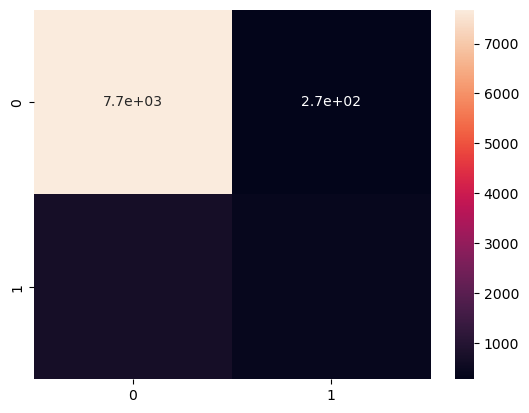

In [37]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

precision_rf = precision_score(y_test, y_pred_test, average='weighted')
recall_rf = recall_score(y_test, y_pred_test, average='weighted')
f1_rf = f1_score(y_test, y_pred_test, average='weighted')

print('Precision = ', precision_rf)
print('Recall = ', recall_rf)
print('F1-Score = ', f1_rf)

sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True)
plt.show()


### 3. Model Improvement Strategies: Discuss potential methods or approaches to enhance model performance. This could include feature engineering, different algorithms, or refining the data preprocessing steps.

#### Here I have used RandomizedSearchCV for hyperparameter tuning, which is a faster and increased efficiency compared to GridSearchCV. 

In [38]:
# Considering only 25000 Rows of Data for Faster HyperParameter Tuning
df_final = df_encoded[:25000]
df_final

,Customer_number,Insurance,balance,housing,loan,duration,campaign,last_contact_day,previous,Term Deposit,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,Gender_F,Gender_M,job_encoded
0,1001,0,2143.0,1,0,261.0,1,2,0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4
1,1002,0,29.0,1,0,151.0,1,2,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9
2,1003,0,2.0,1,1,76.0,1,2,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2
3,1004,0,1506.0,1,0,92.0,1,2,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1
4,1005,0,1.0,0,0,198.0,1,2,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,25996,1,1709.0,0,1,288.0,1,1,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2
24996,25997,0,2619.0,1,0,77.0,2,1,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,9
24997,25998,0,18777.0,1,0,535.0,1,1,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,9
24998,25999,0,2171.0,1,1,1034.0,1,1,0,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4


In [39]:
rf = RandomForestClassifier(random_state=42)

In [40]:
# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


In [41]:
# RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=20, cv=5, verbose=2, 
                                   random_state=42, n_jobs=-1, scoring='f1_weighted')

# Fit the model
random_search.fit(x_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best hyperparameters:", best_params)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None, 'bootstrap': True}


In [42]:
# Get prediction probabilities
y_prob_test = random_search.best_estimator_.predict_proba(x_test)[:, 1]

# Experiment with different thresholds
best_f1 = 0
best_threshold = 0.5

for threshold in np.arange(0.1, 1, 0.1):
    binary_y_pred = np.where(y_prob_test >= threshold, 1, 0)
    f1 = f1_score(y_test, binary_y_pred, average='weighted')
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"Best Threshold: {best_threshold}, Best F1-Score: {best_f1}")

Best Threshold: 0.4, Best F1-Score: 0.8898618727802645


In [43]:
# Final prediction using the best threshold
binary_y_pred = np.where(y_prob_test >= best_threshold, 1, 0)

# Final evaluation metrics
final_precision = precision_score(y_test, binary_y_pred, average='weighted')
final_recall = recall_score(y_test, binary_y_pred, average='weighted')
final_f1 = f1_score(y_test, binary_y_pred, average='weighted')

print(f"Final Precision: {final_precision}")
print(f"Final Recall: {final_recall}")
print(f"Final F1-Score: {final_f1}")

Final Precision: 0.8872118250590176
Final Recall: 0.8933982085591065
Final F1-Score: 0.8898618727802645


In [44]:
print('The Best Possible Model Accuracy comes down to be = ',final_f1)
print('Thus, After HyperParameter Tuning the Model Accuracy increases from \n', f1_rf , 'to', final_f1, 'by', final_f1-f1_rf)

The Best Possible Model Accuracy comes down to be =  0.8898618727802645
Thus, After HyperParameter Tuning the Model Accuracy increases from 
 0.8830697026776136 to 0.8898618727802645 by 0.006792170102650874
